In [1]:
import pandas as pd
import numpy as np
import performance as perf
import utils 
import tears
import plotting

In [2]:
fundamental_ftr1 = pd.read_parquet("./ftr_data/cfoa_div_operating_revenue_ftr.parquet")
fundamental_ftr2 = pd.read_parquet("./ftr_data/cfoa_div_profit_mean_ftr.parquet")
fundamental_ftr3 = pd.read_parquet("./ftr_data/expense_div_op_ftr.parquet")
fundamental_ftr4 = pd.read_parquet("./ftr_data/short_debt_div_op_ftr.parquet")

fundamental_ftr1.index = pd.to_datetime(fundamental_ftr1.index)
fundamental_ftr2.index = pd.to_datetime(fundamental_ftr2.index)
fundamental_ftr3.index = pd.to_datetime(fundamental_ftr3.index)
fundamental_ftr4.index = pd.to_datetime(fundamental_ftr4.index)

In [3]:
daily_df = pd.read_parquet(r"D:\stock_prop_shop\.all\data\price_data\daily\daily_data.parquet")
daily_df = daily_df.drop_duplicates(subset=['date', 'order_book_id'])
close_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="close")
open_df = pd.pivot(daily_df, index="date", columns="order_book_id", values="open")

In [4]:
stks = list(set(fundamental_ftr1.columns).intersection(set(close_df.columns)))
close_df = close_df[stks]

In [5]:
fundamental_ftr1_stack = utils.get_clean_factor_and_forward_returns(fundamental_ftr1.shift(1), close_df, quantiles=10, periods=(20, 40))

Dropped 1.4% entries from factor data: 1.4% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Information Analysis


,20D,40D
IC Mean,0.025,0.031
IC Std.,0.068,0.068
IC_IR,0.369,0.458
t-stat(IC),13.050,16.236
p-value(IC),0.000,0.000
IC Skew,-0.230,-0.097
IC Kurtosis,-0.497,-0.469


c:\Users\41979\Desktop\assignment\utils.py:923: UserWarning: Skipping return periods that aren't exact multiples of days.
  warnings.warn(


Turnover Analysis


,20D,40D
Quantile 1 Mean Turnover,0.208,0.373
Quantile 2 Mean Turnover,0.269,0.462
Quantile 3 Mean Turnover,0.288,0.482
Quantile 4 Mean Turnover,0.303,0.500
Quantile 5 Mean Turnover,0.315,0.516
Quantile 6 Mean Turnover,0.324,0.529
Quantile 7 Mean Turnover,0.320,0.526
Quantile 8 Mean Turnover,0.298,0.499
Quantile 9 Mean Turnover,0.257,0.443
Quantile 10 Mean Turnover,0.198,0.356


,20D,40D
Mean Factor Rank Autocorrelation,0.775,0.591


<Figure size 640x480 with 0 Axes>

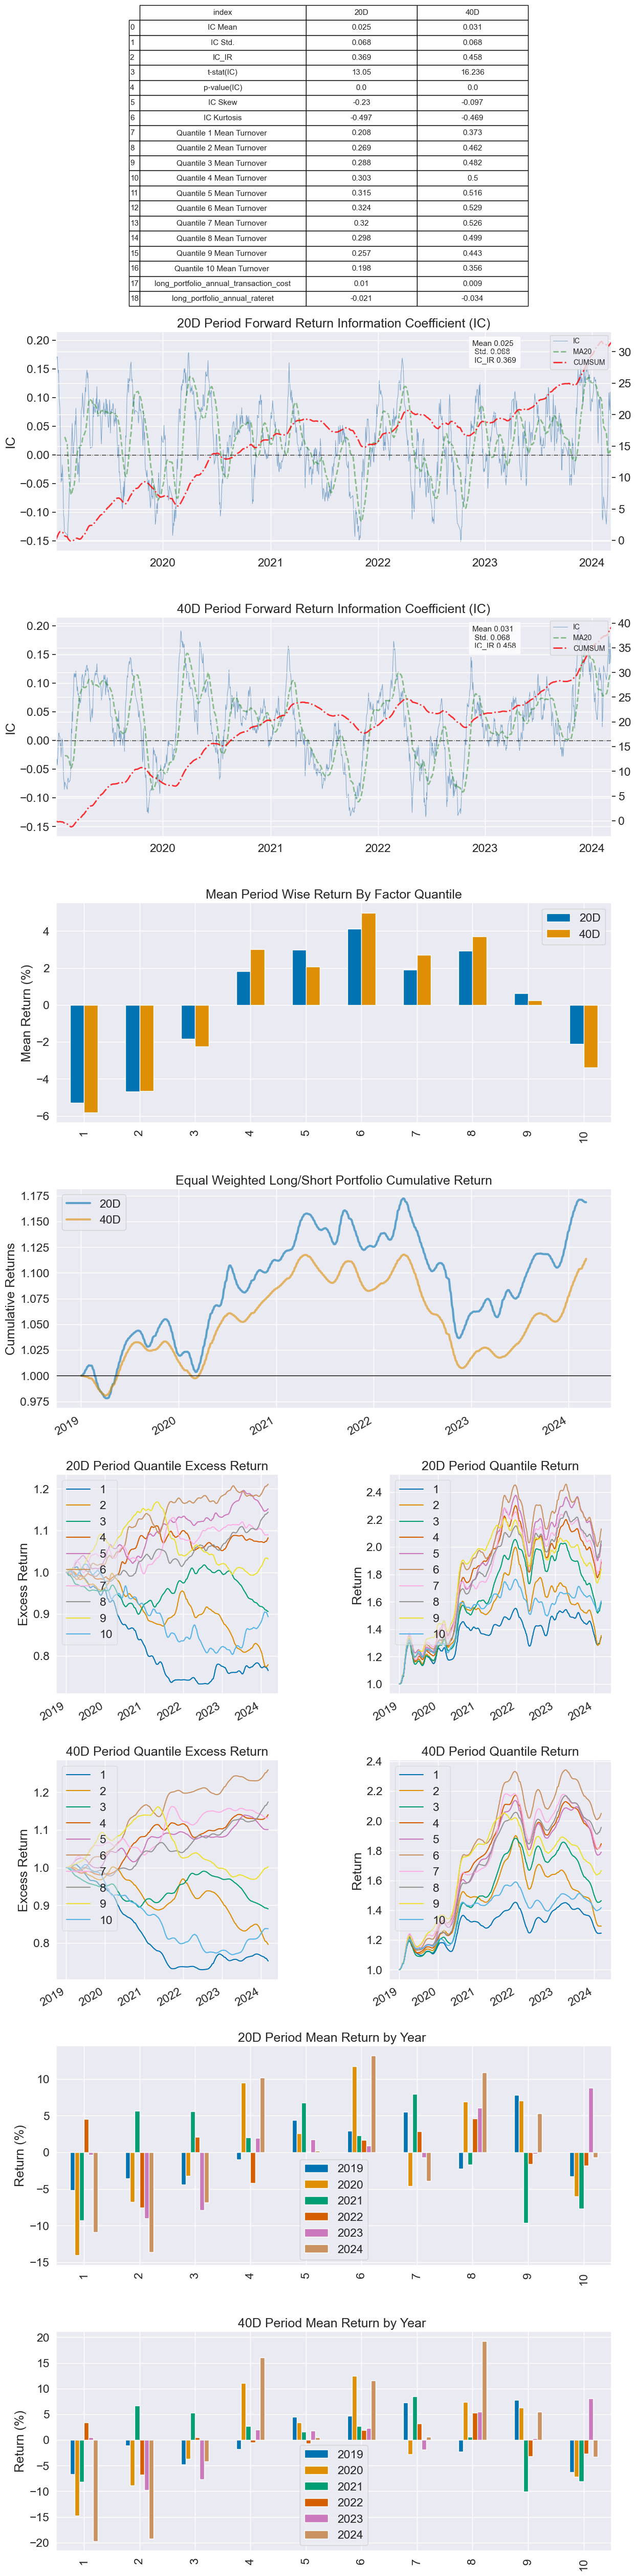

In [6]:
tears.create_summary_tear_sheet(fundamental_ftr1_stack, file_path ="./fundamental_ftr1/")